<a href="https://colab.research.google.com/github/DEV-SPD/PERFORMANCE_PREDICTION_MODEL/blob/main/TSF_TASK_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TSF TASK-1 : PERFORMANCE PREDICTION MODEL**







In [ ]:
# Importing Necessary Libraries for Preprocessing & EDA part
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [ ]:
# Creating dataframe
df = pd.read_csv('scores.csv')

In [ ]:
df 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
df.shape

(25, 2)

In [ ]:
 # Getting a brief statistical description of entire dataframe
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**CHECKING NULL VALUES**

---



In [ ]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

No null values found.Hence now we can proceed towards analysis and modelling parts

**DATA VISUALIZATION**

---



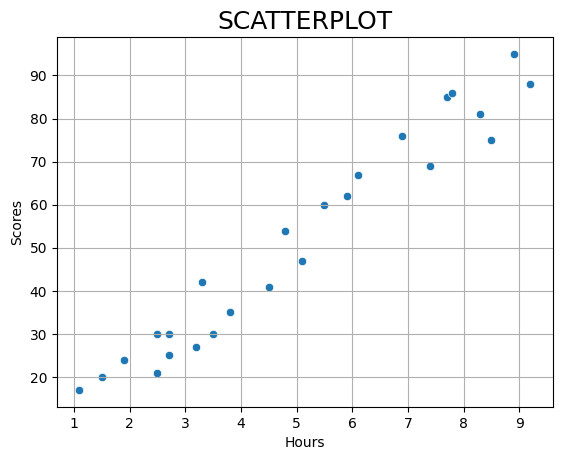

In [ ]:
sns.scatterplot(x=df.Hours, y=df.Scores)
plt.title('SCATTERPLOT',size=18)
plt.grid()

From above scatter plot if we look carefully then we find that no. of hours studied is directly proportional to scores. Hence we can say that there must exist an positive correlation between variables Scores and Hours.

,Hours,Scores
Hours,1.000000,0.884035
Scores,0.884035,1.000000


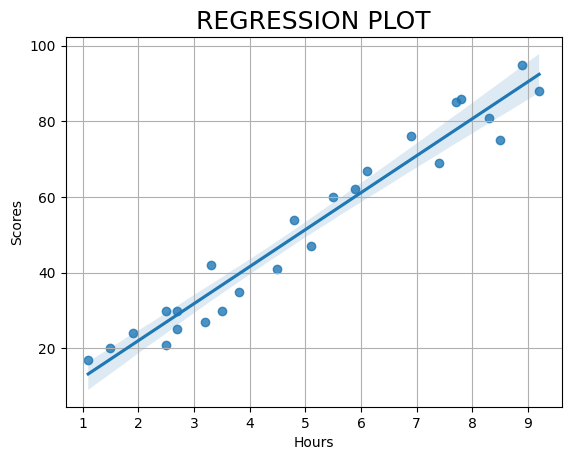

In [ ]:
sns.regplot(x=df.Hours, y=df.Scores)
plt.title('REGRESSION PLOT',size=18)
plt.grid()
df.corr(method = 'kendall')


There exist positive correlation between Hours and Scores (Confirmed!!)

**PREDICTIVE MODELLING**

---












Since we have lesser no. of features our model will suffer underfitting issue and hence we can apply 'REGULARISATION' technique to overcome this problem. 


In [ ]:
# Importing sklearn and its tools
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df.Hours
y= df.Scores

In [ ]:
# Converting into numpy array and then reshaping 1D array into 2D array.
x1= np.array(x)
x_new = x1.reshape(-1,1)
y1= np.array(y)
y_new = y1.reshape(-1,1)
x_new

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [ ]:
# Splitting the entire dataset into train and test data
X1_train, X1_test, y1_train, y1_test = train_test_split(x_new,y_new,test_size=0.3, random_state=32)


In [ ]:
# Scaling X_train
scaler = StandardScaler()
scaler.fit_transform(X1_train)

array([[ 1.42325918],
       [-0.39020321],
       [-1.01059823],
       [-0.96287554],
       [-0.24703512],
       [-0.10386704],
       [ 1.18464571],
       [-0.86743015],
       [-1.2492117 ],
       [ 1.13692301],
       [-0.72426207],
       [ 1.51870457],
       [ 0.08702374],
       [ 0.99375493],
       [-1.82188404],
       [ 0.27791451],
       [ 0.75514146]])

In [ ]:
# Scaling y_train
scaler = StandardScaler()
scaler.fit_transform(y1_train)

array([[ 1.2536771 ],
       [-0.59156192],
       [-1.23739558],
       [-0.54543095],
       [ 0.00814076],
       [-0.31477607],
       [ 1.48433198],
       [-1.09900266],
       [-1.32965754],
       [ 1.43820101],
       [-0.86834778],
       [ 0.97689125],
       [ 0.28492661],
       [ 0.7001054 ],
       [-1.56031241],
       [ 0.37718857],
       [ 1.02302223]])

In [ ]:
# L1 Regularisation i.e. Lasso Regression to overcome underfitting due to less no. of features available
model = Lasso()

In [ ]:
# Loading data into model
model.fit(X1_train, y1_train)


Lasso()

In [ ]:
#checking accuracy score
print("-------MODEL BUILDED WITH ACCURACY SCORE:{}--------".format(model.score(X1_test,y1_test)*100))


-------MODEL BUILDED WITH ACCURACY SCORE:97.75528557573845--------


**ERROR ANALYSIS**

---



This step is to evaluate the model performance

In [ ]:
# Reshaping 2D y1_test array to 1D Y1_test array.
Y1_test = y1_test.reshape(-1)
Y1_test

array([17, 30, 21, 67, 95, 88, 30, 24])

In [ ]:
# Reshaping 2D X1_test array into x1_test array.
x1_test = X1_test.reshape(-1)
x1_test

array([1.1, 2.5, 2.5, 6.1, 8.9, 9.2, 2.7, 1.9])

In [ ]:
# Getting predictions for X1_test
y_pred = model.predict(X1_test)
y_pred

array([12.73723364, 26.3753625 , 26.3753625 , 61.44483672, 88.72109444,
       91.64355062, 28.32366662, 20.53045013])

In [ ]:
# Creating Dictionary which will be used for creating dataframe
data = {
     'Inputs' : x1_test,
    'Actual_Output' : Y1_test,
    'Predicted_Output' : y_pred
}

In [ ]:
# Creating Dataframe by taking dictionary named as data
a = pd.DataFrame(data)
a

,Inputs,Actual_Output,Predicted_Output
0,1.1,17,12.737234
1,2.5,30,26.375363
2,2.5,21,26.375363
3,6.1,67,61.444837
4,8.9,95,88.721094
5,9.2,88,91.643551
6,2.7,30,28.323667
7,1.9,24,20.530450


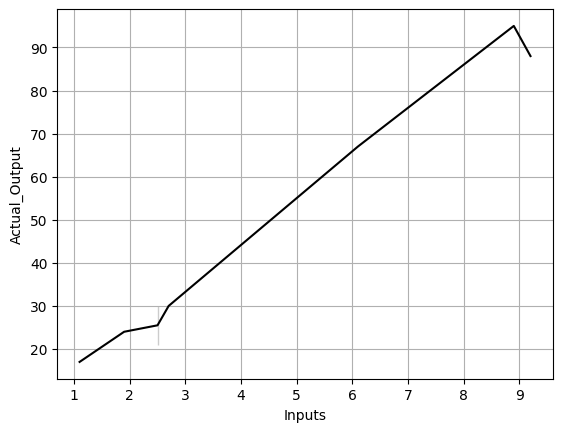

In [ ]:
sns.lineplot(x=a.Inputs ,y=a.Actual_Output, color='black')
plt.grid()

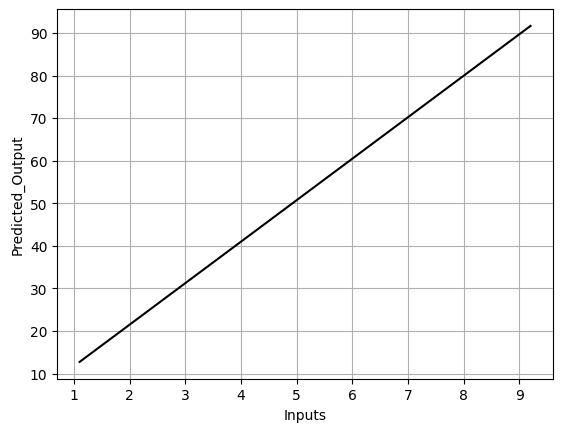

In [ ]:
sns.lineplot(x=a.Inputs ,y=a.Predicted_Output, color='black')
plt.grid()

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
print('Mean Absolute Error that we get during prediction is {}'.format(mean_absolute_error(y_pred,Y1_test)))

Mean Absolute Error that we get during prediction is 4.235783633841889


**PREDICTION**

In [ ]:
#Predicting the score obtained by giving an effort of 9.25 hrs/day
a = model.predict([[9.25]])
a

array([92.13062665])

In [ ]:
print('Score obtained by giving an effort of 9.25 hrs/day is {}%'.format(a))

Score obtained by giving an effort of 9.25 hrs/day is [92.13062665]%


# **AUTHOR NAME : Siba Prasad Das**